In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
full_pumpkins.dropna()
full_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
all_cols = full_pumpkins.columns

In [4]:
for col in all_cols:
    print(full_pumpkins[col].unique())

['BALTIMORE' 'ATLANTA' 'BOSTON' 'CHICAGO' 'COLUMBIA' 'LOS ANGELES'
 'NEW YORK' 'DETROIT' 'DALLAS' 'MIAMI' 'SAN FRANCISCO' 'PHILADELPHIA'
 'ST. LOUIS']
[nan 'Organic']
['24 inch bins' '36 inch bins' '50 lb sacks' '1 1/9 bushel cartons'
 '1/2 bushel cartons' '1 1/9 bushel crates' 'bushel cartons' 'bins'
 '35 lb cartons' 'each' '20 lb cartons' '50 lb cartons' '40 lb cartons'
 'bushel baskets' '22 lb cartons']
[nan 'HOWDEN TYPE' 'HOWDEN WHITE TYPE' 'CINDERELLA' 'FAIRYTALE' 'PIE TYPE'
 'BIG MACK TYPE' 'MIXED HEIRLOOM VARIETIES' 'MINIATURE' 'BLUE TYPE'
 'KNUCKLE HEAD']
[nan 'FLAT TYPE' 'ROUND TYPE']
[nan]
['4/29/17' '5/6/17' '9/24/16' '11/5/16' '11/12/16' '10/1/16' '10/8/16'
 '10/15/16' '10/22/16' '10/29/16' '9/16/17' '9/23/17' '9/30/17' '6/3/17'
 '6/10/17' '6/17/17' '8/19/17' '8/26/17' '9/2/17' '9/9/17' '8/12/17'
 '11/19/16' '11/26/16' '12/3/16' '12/10/16' '1/7/17' '1/14/17' '1/21/17'
 '1/28/17' '2/4/17' '2/11/17' '2/18/17' '2/25/17' '3/4/17' '3/11/17'
 '3/18/17' '3/25/17' '4/1/17' '4/8/17'

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [6]:
all_cols
print(full_pumpkins.shape)
print(full_pumpkins.isna().sum())  # Check for missing values


(1757, 26)
City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64


In [7]:
columns_to_drop = [
    "Grade",
    "Environment",
    "Quality",
    "Condition",
    "Appearance",
    "Storage",
    "Crop",
    "Trans Mode",
    "Unnamed: 24",
    "Unnamed: 25",
]

cleaned_pumpkins = full_pumpkins.drop(columns=columns_to_drop)

In [8]:
cleaned_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Date             1757 non-null   object 
 6   Low Price        1757 non-null   float64
 7   High Price       1757 non-null   float64
 8   Mostly Low       1654 non-null   float64
 9   Mostly High      1654 non-null   float64
 10  Origin           1754 non-null   object 
 11  Origin District  131 non-null    object 
 12  Item Size        1478 non-null   object 
 13  Color            1141 non-null   object 
 14  Unit of Sale     162 non-null    object 
 15  Repack           1757 non-null   object 
dtypes: float64(4), object(12)
memory usage: 219.8+ KB


In [9]:
cleaned_pumpkins

,City Name,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,4/29/17,270.00,280.00,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,E
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,5/6/17,270.00,280.00,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,E
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,9/24/16,160.00,160.00,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,N
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,9/24/16,160.00,160.00,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,N
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,11/5/16,90.00,100.00,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,9/30/16,14.75,14.75,NaN,NaN,ILLINOIS,NaN,NaN,WHITE,NaN,N
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/26/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/27/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/28/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N


In [12]:
num_cols = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High']
cat_cols = ['Type', 'Variety', 'Sub Variety', 'Origin', 'Item Size', 'Color']


In [13]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)



In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [15]:
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [18]:
cleaned_pumpkins

,City Name,Type,Package,Variety,Sub Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Unit of Sale,Repack
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,4/29/17,270.00,280.00,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,E
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,5/6/17,270.00,280.00,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,E
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,9/24/16,160.00,160.00,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,N
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,9/24/16,160.00,160.00,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,N
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,11/5/16,90.00,100.00,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,9/30/16,14.75,14.75,NaN,NaN,ILLINOIS,NaN,NaN,WHITE,NaN,N
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/26/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/27/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,9/28/16,275.00,275.00,NaN,NaN,MICHIGAN,NaN,sml,NaN,NaN,N


In [19]:
X = cleaned_pumpkins.drop(columns=['City Name'])
y = cleaned_pumpkins['City Name']

In [20]:
y.unique()

array(['BALTIMORE', 'ATLANTA', 'BOSTON', 'CHICAGO', 'COLUMBIA',
       'LOS ANGELES', 'NEW YORK', 'DETROIT', 'DALLAS', 'MIAMI',
       'SAN FRANCISCO', 'PHILADELPHIA', 'ST. LOUIS'], dtype=object)

In [21]:
y = y.apply(lambda x: 1 if x == 'BALTIMORE' else 0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Low Price', 'High Price',
                                                   'Mostly Low',
                                                   'Mostly High']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Variety',
                                                   'Sub Variety', 'Origin',
                                                   'Item Size', 'Color'])])),
                ('classifier', LogisticRegression())])

In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       327
           1       0.94      0.68      0.79        25

    accuracy                           0.97       352
   macro avg       0.96      0.84      0.89       352
weighted avg       0.97      0.97      0.97       352



In [26]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression


In [28]:
print("F1_score: ", f1_score(y_test, y_pred))

F1_score:  0.7906976744186046


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[326,   1],
       [  8,  17]])

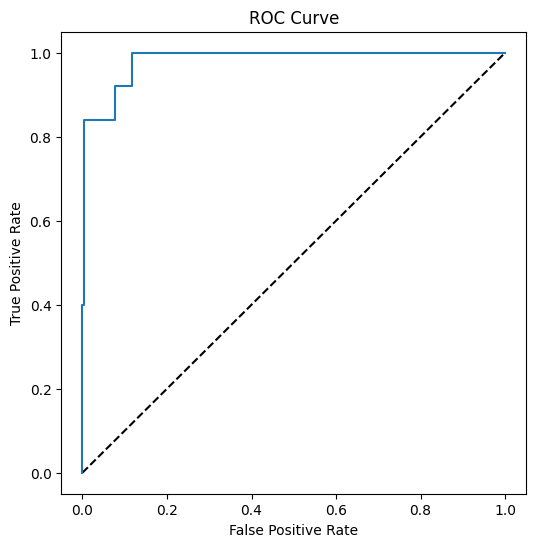

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [31]:
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.9832415902140672
